In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/data_science/sales_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      942 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  943 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


False


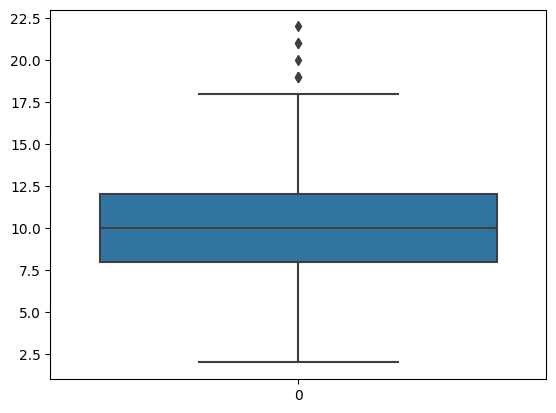

In [35]:
df3 = df
print(df3['Sale Date'].isna().values.any())
df3['Region']=df3['Region'].fillna('Unknow')
df3['Product']=df3['Product'].fillna('Unknow')
sns.boxplot(df['Units Sold'])
plt.show()



In [59]:
region_median = df3.groupby('Region')['Units Sold'].median()
region_median

Region
Region_1     10.5
Region_10    10.0
Region_2     10.0
Region_3     10.0
Region_4     10.0
Region_5     10.0
Region_6     10.0
Region_7     11.0
Region_8     11.0
Region_9     10.0
Unknow       10.0
Name: Units Sold, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


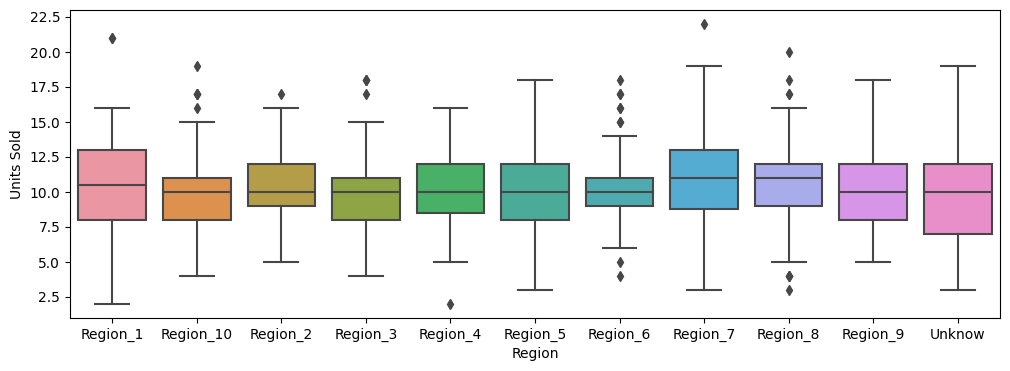

In [111]:
df4 = df3
df4['Units Sold']=df4['Units Sold'].fillna(df4.groupby('Region')['Units Sold'].transform('median'))
df4['Price']=df4['Price'].fillna(df4.groupby('Region')['Price'].transform('mean'))
#upper_limit = 18

upper_limit = df4['Units Sold'].mean() + 3*df4['Units Sold'].std()
lower_limit = df4['Units Sold'].mean() + 3*df4['Units Sold'].std()

df4_filtered_Sold = df4[(df4["Units Sold"] < upper_limit) | (df4["Units Sold"] > lower_limit)]

#df4_filtered_Sold = df4[(df4["Units Sold"] < upper_limit)]

df4.info()
fig= plt.subplots(figsize=(12,4))
sns.boxplot(
    data= df4_filtered_Sold.reset_index().sort_values(by='Region'),
    x='Region',
    y='Units Sold'
)
plt.show()
